In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Understanding ###
+ Dataframe shape
+ head and tail
+ dtypes
+ describe

In [3]:
df = pd.read_csv('../csv/appearances.csv')
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [4]:
df['minutes_played'].max()

120

In [5]:
df['minutes_played'].min()

1

In [6]:
# Group by player_name and count unique player_id
player_duplicates = df.groupby('player_name')['player_id'].nunique()

# Filter out players with more than one player_id
player_duplicates = player_duplicates[player_duplicates > 1]

# Count the number of players with same name but different IDs
num_players_with_duplicates = player_duplicates.count()

print("Number of players with the same name but different IDs:", num_players_with_duplicates)


Number of players with the same name but different IDs: 364


In [7]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507351 entries, 0 to 1507350
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1507351 non-null  object
 1   game_id                 1507351 non-null  int64 
 2   player_id               1507351 non-null  int64 
 3   player_club_id          1507351 non-null  int64 
 4   player_current_club_id  1507351 non-null  int64 
 5   date                    1507351 non-null  object
 6   player_name             1507027 non-null  object
 7   competition_id          1507351 non-null  object
 8   yellow_cards            1507351 non-null  int64 
 9   red_cards               1507351 non-null  int64 
 10  goals                   1507351 non-null  int64 
 11  assists                 1507351 non-null  int64 
 12  minutes_played          1507351 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 149.5+ MB


In [9]:
df.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06
mean,3.014718e+06,1.798913e+05,2.881502e+03,3.638909e+03,1.490230e-01,3.827244e-03,9.635778e-02,7.431050e-02,6.964984e+01
std,5.570794e+05,1.652259e+05,7.113885e+03,9.309395e+03,3.675721e-01,6.174624e-02,3.318755e-01,2.834195e-01,2.976078e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.518634e+06,5.369600e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
50%,2.917390e+06,1.271420e+05,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450701e+06,2.608060e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.227848e+06,1.186012e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


In [10]:
df.shape

(1507351, 13)

In [11]:
df.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

+ appearance_id: Unique identifier for each appearance.
+ game_id: Unique identifier for each game.
+ player_id: Unique identifier for each player.
+ player_club_id: Identifier for the club the player belonged to at the time of the appearance.
+ player_current_club_id: Identifier for the current club of the player.
+ date: Date of the appearance.
+ player_name: Name of the player.
+ competition_id: Identifier for the competition in which the appearance took place.
+ yellow_cards: Number of yellow cards received by the player in the appearance.
+ red_cards: Number of red cards received by the player in the appearance.
+ goals: Number of goals scored by the player in the appearance.
+ assists: Number of assists provided by the player in the appearance.
+ minutes_played: Duration of time the player participated in the appearance, in minutes.

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation

In [12]:
df.isnull().sum()

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

In [13]:
# drop rows with missing values
dff = df.dropna()
dff.shape

(1507027, 13)

In [14]:
dff.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [15]:
# drop irrelevant columns
dff = dff.drop(['appearance_id', 'game_id', 'player_club_id', 'player_current_club_id', 'competition_id'], axis=1)

In [16]:
dff.columns

Index(['player_id', 'date', 'player_name', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played'],
      dtype='object')

In [17]:
# check for duplicated columns
dff.duplicated().sum()

0

In [18]:
# check players that have same name
dff['player_name'].value_counts()

player_name
Danilo                 1072
Paulinho               1033
Marcelo                 911
Guilherme               716
João Pedro              704
                       ... 
Alessandro Mastalli       1
Mirko Esposito            1
Jordan Stewart            1
Tucka                     1
Ayman Aourir              1
Name: count, Length: 23296, dtype: int64

In [19]:
dff.head()

,player_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,38004,2012-07-03,Aurélien Joachim,0,0,2,0,90
1,79232,2012-07-05,Ruslan Abyshov,0,0,0,0,90
2,42792,2012-07-05,Sander Puri,0,0,0,0,45
3,73333,2012-07-05,Vegar Hedenstad,0,0,0,0,90
4,122011,2012-07-05,Markus Henriksen,0,0,0,1,90


In [34]:
# feature creation
dff['total_cards'] = dff['yellow_cards'] + dff['red_cards']
dff

,player_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played,total_cards
0,38004,2012-07-03,Aurélien Joachim,0,0,2,0,90,0
1,79232,2012-07-05,Ruslan Abyshov,0,0,0,0,90,0
2,42792,2012-07-05,Sander Puri,0,0,0,0,45,0
3,73333,2012-07-05,Vegar Hedenstad,0,0,0,0,90,0
4,122011,2012-07-05,Markus Henriksen,0,0,0,1,90,0
...,...,...,...,...,...,...,...,...,...
1507346,659813,2023-11-30,Piero Hincapié,0,0,0,0,90,0
1507347,696027,2023-11-30,Ayman Aourir,0,0,0,0,2,0
1507348,7161,2023-11-30,Jonas Hofmann,0,0,0,0,10,0
1507349,743395,2023-11-30,Noah Mbamba,0,0,0,0,45,0


In [21]:
dff.columns

Index(['player_id', 'date', 'player_name', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'total_cards'],
      dtype='object')

### Step 3: Feature Understanding ###

1. **Player Discipline:**
    - Which player has the highest total number of cards (yellow + red)?
    - Is there a correlation between the number of yellow cards a player receives and their playing time?

2. **Scoring Contribution:**
    - Which players have the highest number of goals and assists?
    - Is there a correlation between the number of goals/assists and minutes played?

3. **Consistency Analysis:**
    - Analyze the consistency of player performance over time by comparing their statistics across different dates.

5. **Disciplinary Trends:**
    - Track the frequency of yellow and red cards for each player over time to identify any trends or patterns in their behavior.

6. **Impact of Cards:**
    - Investigate how receiving cards (yellow or red) affects a player's subsequent performance or availability for future matches.

7. **Player Comparison:**
    - Compare the performance of different players based on their statistical contributions in goals, assists, and cards.

In [22]:
# player discipline
player_cards = dff.groupby('player_name')['total_cards'].sum().sort_values(ascending=False)
player_cards

player_name
Danilo              216
Paulinho            184
Marcelo             179
Fernando            172
Sergio Ramos        144
                   ... 
Pietro Boer           0
Gianluca Korte        0
Gianluca Maria        0
Gianluca Musacci      0
Αbdul Razak           0
Name: total_cards, Length: 23296, dtype: int64

In [44]:
dff['total_cards'].max()

2

In [23]:
# correlation between yellow cards and minutes played
corr = dff[['yellow_cards', 'minutes_played']].corr()
corr

,yellow_cards,minutes_played
yellow_cards,1.000000,0.108539
minutes_played,0.108539,1.000000


In [24]:
# scoring contribution
player_goals = dff.groupby('player_name')['goals'].sum().sort_values(ascending=False)
player_goals

player_name
Robert Lewandowski    449
Lionel Messi          443
Cristiano Ronaldo     432
Luis Suárez           308
Harry Kane            290
                     ... 
Frankie Kent            0
Frank Sturing           0
Frank Ronstadt          0
Frank Boeckx            0
Αbdul Razak             0
Name: goals, Length: 23296, dtype: int64

In [35]:
robert_l_data = df.loc[df['player_name'] == 'Robert Lewandowski']
robert_l_data

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
5593,2229332_38253,2229332,38253,16,131,2012-08-12,Robert Lewandowski,DFL,0,0,1,0,90
5991,2221749_38253,2221749,38253,16,131,2012-08-18,Robert Lewandowski,DFB,0,0,0,1,69
9513,2222535_38253,2222535,38253,16,131,2012-08-24,Robert Lewandowski,L1,0,0,0,1,90
14529,2231387_38253,2231387,38253,16,131,2012-09-01,Robert Lewandowski,L1,0,0,0,0,90
17977,2231428_38253,2231428,38253,16,131,2012-09-15,Robert Lewandowski,L1,0,0,1,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496348,4113118_38253,4113118,38253,131,131,2023-11-04,Robert Lewandowski,ES1,0,0,0,0,57
1498878,4174067_38253,4174067,38253,131,131,2023-11-07,Robert Lewandowski,CL,0,0,0,0,90
1502477,4113116_38253,4113116,38253,131,131,2023-11-12,Robert Lewandowski,ES1,1,0,2,0,90
1504222,4113089_38253,4113089,38253,131,131,2023-11-25,Robert Lewandowski,ES1,0,0,0,0,90


In [36]:
game_id_count = robert_l_data['game_id'].nunique()

print("Number of goals of Robert Lewandowski:", game_id_count)

Numero di game_id diversi per Robert Lewandowski: 534


In [25]:
# correlation between goals and minutes played

In [26]:
corr = dff[['goals', 'minutes_played']].corr()
corr

,goals,minutes_played
goals,1.000000,0.078724
minutes_played,0.078724,1.000000


In [27]:
# scoring contribution
# which players have the highest number of assists
# Calculate total assists per player_id
assists_per_player = dff.groupby('player_id')['assists'].sum()

top_assist_players = assists_per_player.sort_values(ascending=False).head(10)

merged_df = pd.merge(top_assist_players, dff[['player_id', 'player_name']], on='player_id', how='left').drop_duplicates()
merged_df

,player_id,assists,player_name
0,28003,219,Lionel Messi
512,58358,202,Thomas Müller
1035,88755,192,Kevin De Bruyne
1482,36139,182,Dusan Tadic
1975,45320,161,Ángel Di María
2422,44352,139,Luis Suárez
2857,68290,136,Neymar
3199,217111,133,Hakim Ziyech
3595,69633,129,Christian Eriksen
4067,37647,127,Dimitri Payet


In [28]:
# correlation between assists and minutes played
corr = dff[['assists', 'minutes_played']].corr()
corr

,assists,minutes_played
assists,1.000000,0.076643
minutes_played,0.076643,1.000000


<Axes: title={'center': 'Lionel Messi: Cumulative Goals and Assists Over Time'}, xlabel='date'>

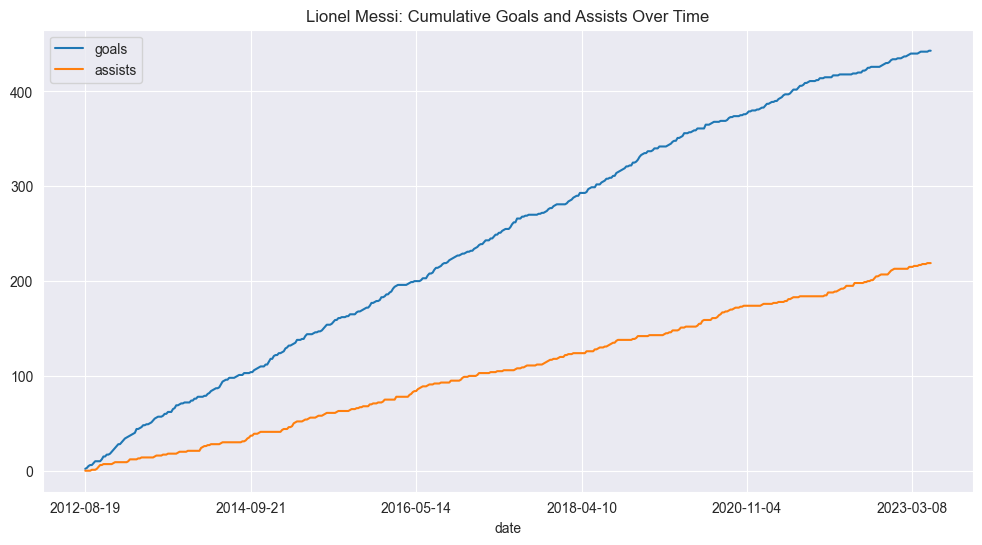

In [29]:
# consistency analysis
# Analyze the consistency of player performance over time by comparing their statistics across different dates.
# Let's focus on Leonel Messi
messi = dff[dff['player_name'] == 'Lionel Messi']
# Group by date and calculate the total goals and assists for each date
messi_stats = messi.groupby('date')[['goals', 'assists']].sum()
m = pd.DataFrame(messi_stats, index=messi_stats.index, columns=['goals', 'assists'])
m = m.cumsum()
m.plot(figsize=(12, 6), title='Lionel Messi: Cumulative Goals and Assists Over Time')

<Axes: title={'center': 'Sergio Ramos: Cumulative Cards Over Time'}, xlabel='date'>

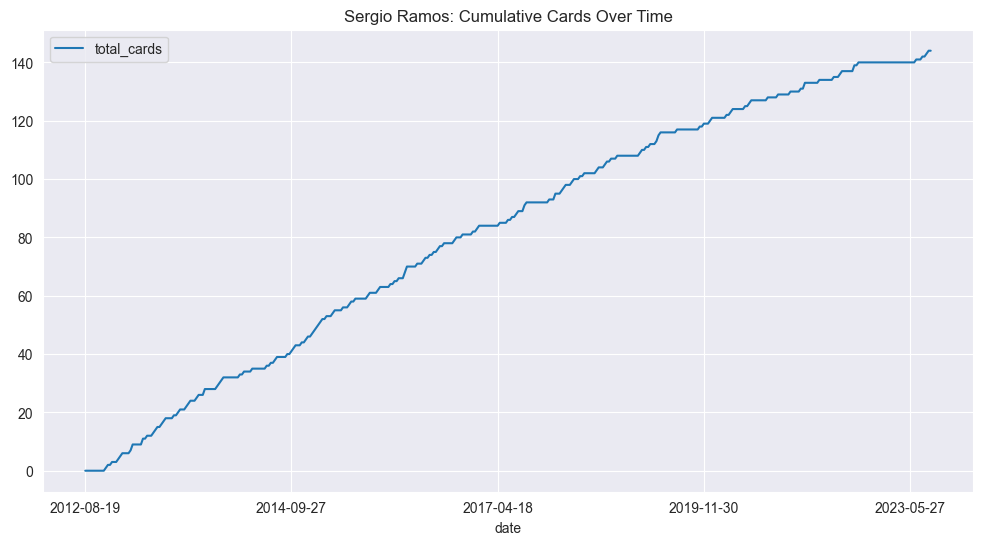

In [30]:
# disciplinary trends
# Track the frequency of yellow and red cards for each player over time to identify any trends or patterns in their behavior.
# Let's focus on Sergio Ramos
ramos = dff[dff['player_name'] == 'Sergio Ramos']
# Group by date and calculate the total cards for each date
ramos_stats = ramos.groupby('date')['total_cards'].sum()
r = pd.DataFrame(ramos_stats, index=ramos_stats.index, columns=['total_cards'])
r = r.cumsum()
r.plot(figsize=(12, 6), title='Sergio Ramos: Cumulative Cards Over Time')

<Axes: title={'center': 'Cristiano Ronaldo: Cumulative Cards Over Time'}, xlabel='date'>

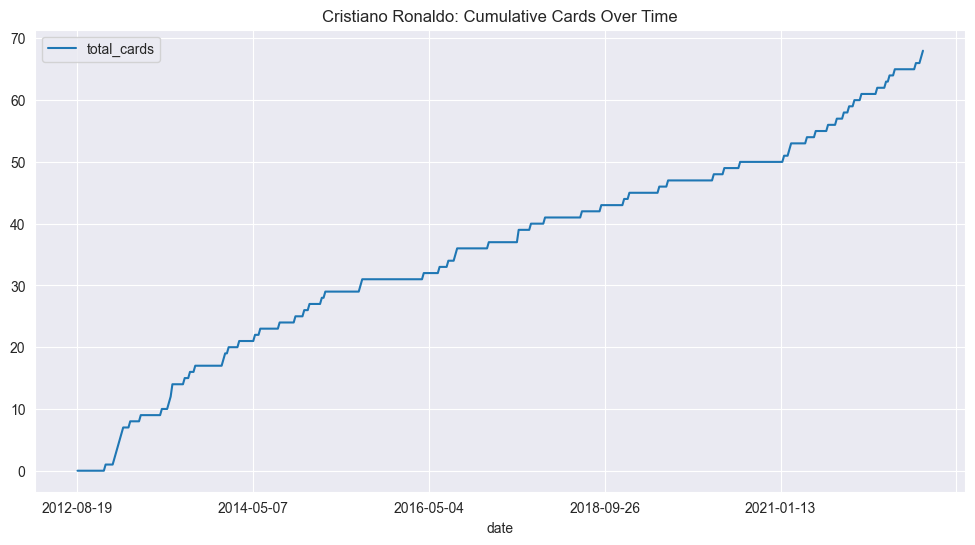

In [31]:
# impact of cards
# Investigate how receiving cards (yellow or red) affects a player's subsequent performance or availability for future matches.
# Let's focus on Cristiano Ronaldo
ronaldo = dff[dff['player_name'] == 'Cristiano Ronaldo']
# Group by date and calculate the total cards for each date
ronaldo_stats = ronaldo.groupby('date')['total_cards'].sum()
ron = pd.DataFrame(ronaldo_stats, index=ronaldo_stats.index, columns=['total_cards'])
ron = ron.cumsum()
ron.plot(figsize=(12, 6), title='Cristiano Ronaldo: Cumulative Cards Over Time')

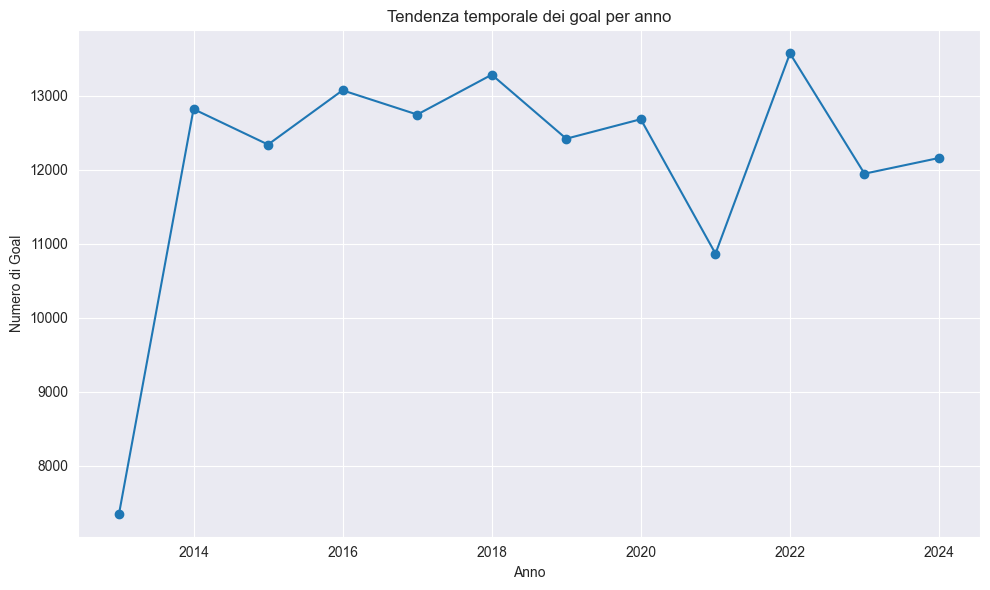

In [68]:
dff['date'] = pd.to_datetime(dff['date'])

goals_per_year = dff.groupby(pd.Grouper(key='date', freq='Y'))['goals'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(goals_per_year['date'], goals_per_year['goals'], marker='o', linestyle='-')
plt.title('Temporal trend of goals per year')
plt.xlabel('Years')
plt.ylabel('Number of goals')
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
dff['date'].max()

Timestamp('2023-11-30 00:00:00')

In [70]:
dff['date'].min()

Timestamp('2012-07-03 00:00:00')

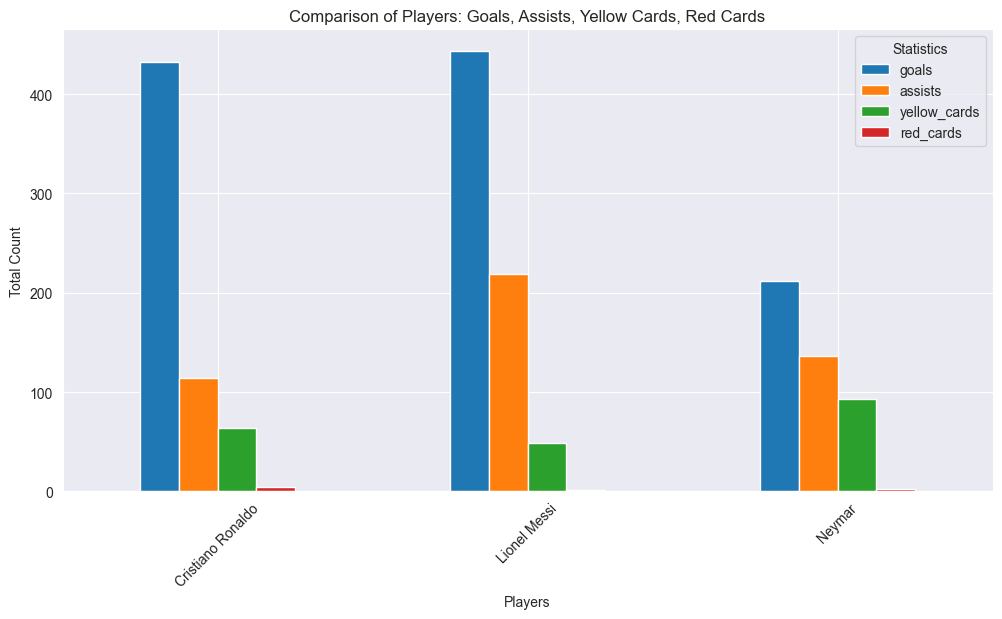

In [32]:
# player comparison
# Compare the performance of different players based on their statistical contributions in goals, assists, and cards.
# Let's compare Lionel Messi, Cristiano Ronaldo, and Neymar
players = ['Lionel Messi', 'Cristiano Ronaldo', 'Neymar']

# Filter the DataFrame for the specified players
player_comparison = dff[dff['player_name'].isin(players)]

# Group by player_name and calculate the total goals, assists, yellow cards, and red cards for each player
player_comparison_stats = player_comparison.groupby('player_name').agg({
    'goals': 'sum',
    'assists': 'sum',
    'yellow_cards': 'sum',
    'red_cards': 'sum'
})

# Plotting
player_comparison_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Players: Goals, Assists, Yellow Cards, Red Cards')
plt.xlabel('Players')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.show()

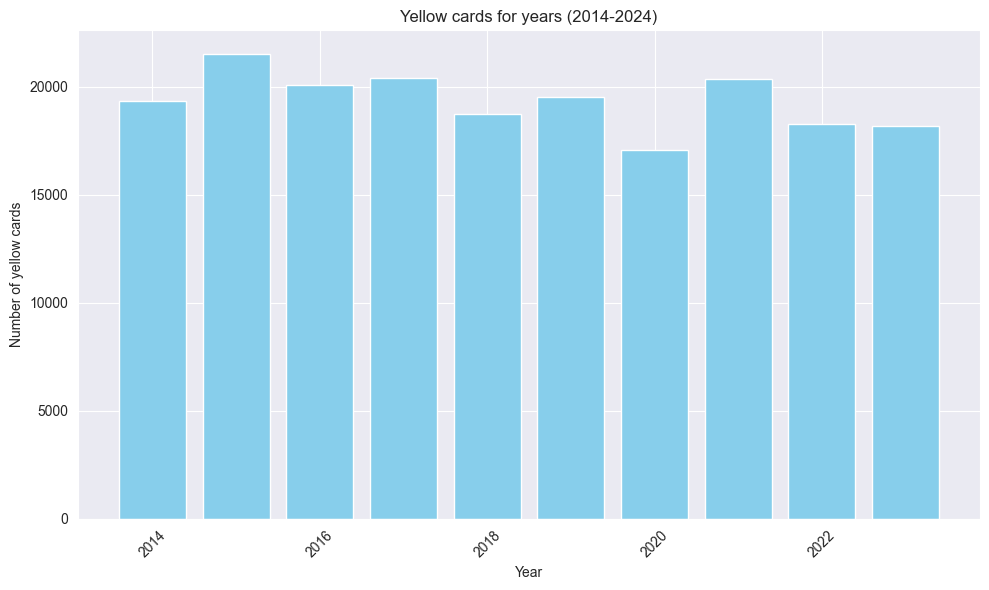

In [75]:
dff['date'] = pd.to_datetime(dff['date'])

yellow_cards_per_year = dff.groupby(dff['date'].dt.year)['yellow_cards'].sum().reset_index()

years_range = range(2014, 2024)

yellow_cards_per_year = yellow_cards_per_year.set_index('date').reindex(years_range).fillna(0).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yellow_cards_per_year['date'], yellow_cards_per_year['yellow_cards'], color='skyblue')
plt.title('Yellow cards for years (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Number of yellow cards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

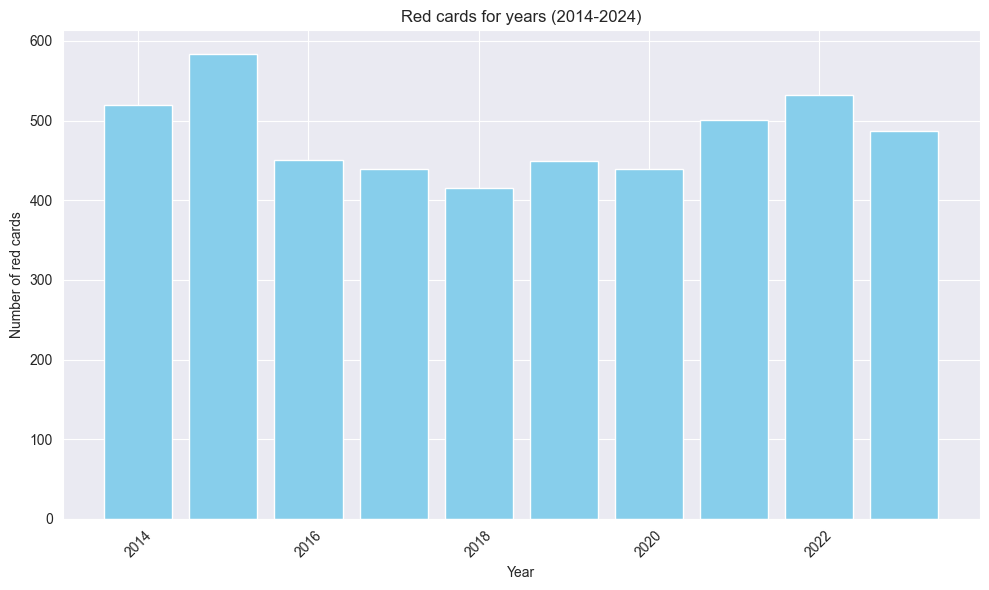

In [77]:
dff['date'] = pd.to_datetime(dff['date'])

red_cards_per_year = dff.groupby(dff['date'].dt.year)['red_cards'].sum().reset_index()

years_range = range(2014, 2024)

red_cards_per_year = red_cards_per_year.set_index('date').reindex(years_range).fillna(0).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(red_cards_per_year['date'], red_cards_per_year['red_cards'], color='skyblue')
plt.title('Red cards for years (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Number of red cards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

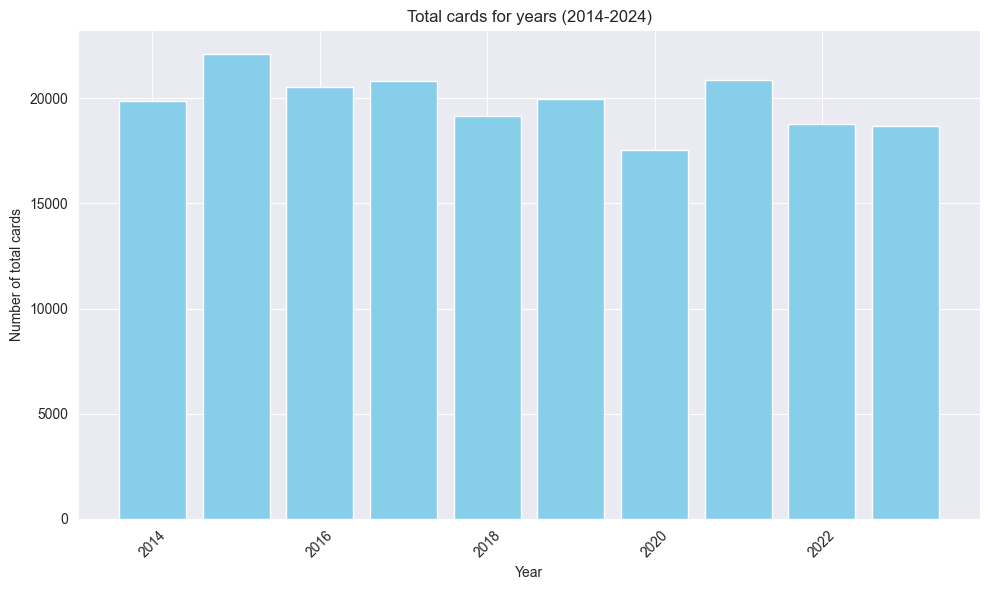

In [78]:
dff['date'] = pd.to_datetime(dff['date'])

total_cards_per_year = dff.groupby(dff['date'].dt.year)['total_cards'].sum().reset_index()

years_range = range(2014, 2024)

total_cards_per_year = total_cards_per_year.set_index('date').reindex(years_range).fillna(0).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_cards_per_year['date'], total_cards_per_year['total_cards'], color='skyblue')
plt.title('Total cards for years (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Number of total cards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
dff.columns

Index(['player_id', 'date', 'player_name', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'total_cards'],
      dtype='object')

<Axes: ylabel='minutes_played'>

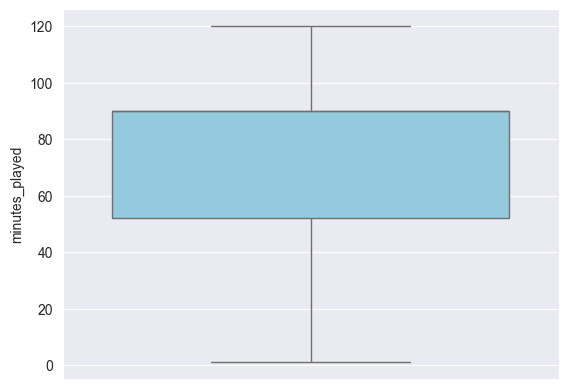

In [41]:
sns.boxplot(data = dff['minutes_played'],
            color = 'skyblue')

In [45]:
# correlation between goals and red cards
corr = dff[['goals', 'red_cards']].corr()
corr

,goals,red_cards
goals,1.000000,-0.008995
red_cards,-0.008995,1.000000


In [46]:
# correlation between goals and yellow cards
corr = dff[['goals', 'yellow_cards']].corr()
corr

,goals,yellow_cards
goals,1.000000,0.000912
yellow_cards,0.000912,1.000000


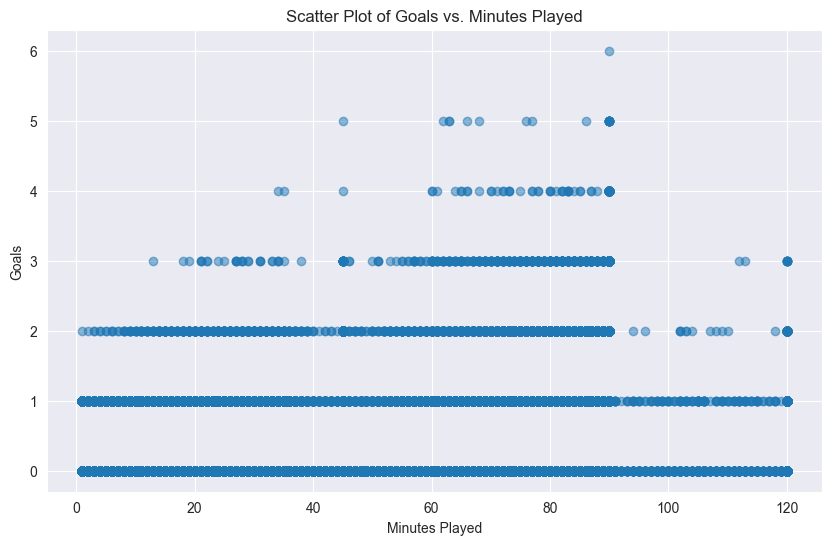

In [48]:
dff_filtered = dff[dff['minutes_played'] > 0]

plt.figure(figsize=(10, 6))
plt.scatter(dff_filtered['minutes_played'], dff_filtered['goals'], alpha=0.5)

plt.title('Scatter Plot of Goals vs. Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')

plt.grid(True)
plt.show()

In [65]:
total_goals_per_player_date = dff.groupby(['player_id', 'player_name', 'date'])['goals'].sum().reset_index(name='total_goals')

max_goals_index = total_goals_per_player_date.groupby('date')['total_goals'].idxmax()

player_with_max_goals = total_goals_per_player_date.loc[max_goals_index].sort_values(by='total_goals', ascending=False)

print(player_with_max_goals)

        player_id           player_name        date  total_goals
962127     191891       Arkadiusz Milik  2014-09-24            6
184984      30418           Marcus Berg  2016-04-17            5
31             10        Miroslav Klose  2013-05-05            5
48715        8198     Cristiano Ronaldo  2015-09-12            5
248207      38253    Robert Lewandowski  2015-09-22            5
...           ...                   ...         ...          ...
706061     115507        Bruno Zuculini  2016-09-06            0
82315       15118  Thomas Augustinussen  2014-07-19            0
381650      54787         Ivan Temnikov  2022-11-15            0
359495      51532             Kike Sola  2016-09-08            0
539750      75964         Sergio Molina  2013-09-04            0

[3324 rows x 4 columns]
